In [32]:
import numpy as np
import matplotlib.pyplot as plt


def cutoff_function(R_ij, R_c):
    
    mag_Rij = np.linalg.norm(R_ij)
    mag_Rc = np.linalg.norm(R_c)
    
    if mag_Rij <= mag_Rc:
        return 0.5 * (np.cos(np.pi * mag_Rij / mag_Rc) + 1)
    else:
        return 0

1. Obtain element-speciﬁc neighbour densities for each atom in the system.

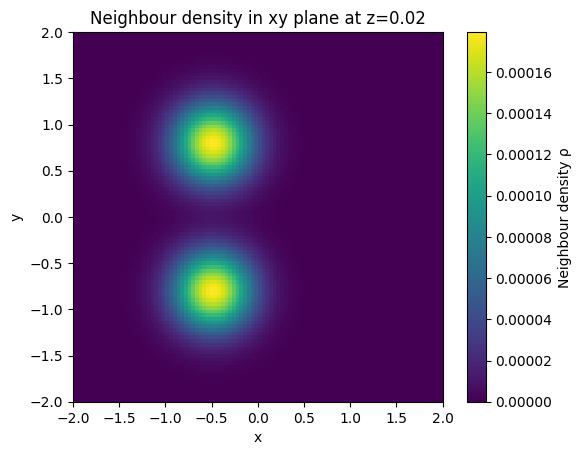

In [53]:
# water molecule positions


O = np.array([0.0000 ,0.00000 , 0.0000])
H1 = np.array([0.48921,-0.80635,0.35195])
H2 = np.array([0.48921, 0.80635, 0.35195])

N_atoms = 3
atoms = np.zeros((N_atoms,3))

atoms[0] = O
atoms[1] = H1
atoms[2] = H2

species = ['O','H','H']

def neighbour_density(x,y,z,i,s,atoms: np.ndarray, species: np.ndarray, sigma_a: float=0.3, R_c: float=10):
    '''
    each atom (i) has a neighbourDensity (rho) for each species (s).
    '''
    
    rho = np.zeros_like(x)
    
    
    for j in range(0,len(atoms)):
        
        if s == species[j]:
            
            Rij = atoms[i] - atoms[j]
         
            R = np.stack([x, y, z], axis=-1)
            
            rho += np.exp(-(np.linalg.norm((R - Rij),axis=-1)**2 ) / (2*sigma_a**2)) * cutoff_function(Rij,R_c)

            
    return rho



def example_plot():
    
    x = np.linspace(-2,2,100)
    y = np.linspace(-2,2,100)
    z = np.linspace(-2,2,100)
    
    X,Y,Z = np.meshgrid(x,y,z)
    
    Rvals = np.linspace(0, 10, 100)
    
    rho = neighbour_density(X,Y,Z, 0, 'H', atoms, species)
    z_index = rho.shape[2] // 2
    rho_xy = rho[:, :, 10]
    rho_x = rho[:,0,0]
    plt.imshow(rho_xy, origin='lower', 
           extent=[x[0], x[-1], y[0], y[-1]],  # sets axes to real coordinates
           cmap='viridis')
    plt.colorbar(label='Neighbour density ρ')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Neighbour density in xy plane at z={z[z_index]:.2f}')  
    plt.show()

example_plot()


2. Expand these densities in a radial and angular basis and obtain the
resulting expansion coeﬃcients

Deciding on a Radial basis function:


$$ G_n(r) = \exp\Big(\frac{-(r-r_n)}{2\sigma{}^2}\Big) $$


In [55]:
def radial_function(r,n,n_max,R_c,sigma: float=0.3):
    
    r_n = R_c/n_max * n
    
    G = np.exp((-(r-r_n))/(2*sigma**2))
    
    return G

    
    